In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

Original article:

https://towardsdatascience.com/pfizer-and-moderna-vaccine-efficacy-calculated-from-data-9566897173c

In [2]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize'] = 'xx-large'

In [3]:
def theta_vals(dt):
    # https://stats.stackexchange.com/questions/21298/confidence-interval-around-the-ratio-of-two-proportions
    x1, n1, x2, n2 = dt
    # relative risk
    theta = (x1 / n1) / (x2 / n2)
    # variance of the logarithm of relative risk
    var_log_theta = 1 / x1 - 1 / n1 + 1 / x2 - 1 / n2
    # standard error of the logarithm of relative risk
    SE_log_theta = np.sqrt(var_log_theta)
    return (theta, SE_log_theta)


def plot_points(dt):
    theta, SE_log_theta = dt
    x = np.linspace(-10, 0, num = 1000)
    y = norm.pdf(x, loc = np.log(theta), scale = SE_log_theta)
    return (1 - np.exp(x), y)


def conf_int(dt):
    theta, SE_log_theta = dt
    ex = 1.95996 * SE_log_theta
    lower = int(10000 * (1 - theta * np.exp(+ex))) / 100
    upper = int(10000 * (1 - theta * np.exp(-ex))) / 100
    return (lower, upper)


def ratios(dt):
    x1, n1, x2, n2 = dt
    return (x1 / n1, x2 / n2)

In [4]:
# https://www.nejm.org/doi/full/10.1056/NEJMoa2034577
pfizer = (8, 21720, 162, 21728)
pfizer_theta = theta_vals(pfizer)
pfizer_x, pfizer_y = plot_points(pfizer_theta)
conf_int(pfizer_theta)

(89.95, 97.57)

In [5]:
1 - pfizer_theta[0]

0.9505990951049269

In [6]:
# https://investors.modernatx.com/news-releases/news-release-details/moderna-announces-primary-efficacy-analysis-phase-3-cove-study
moderna = (11, 15000, 185, 15000)
moderna_theta = theta_vals(moderna)
moderna_x, moderna_y = plot_points(moderna_theta)
conf_int(moderna_theta)

(89.08, 96.76)

In [7]:
1 - moderna_theta[0]

0.9405405405405405

In [8]:
# https://www.bharatbiotech.com/images/press/covaxin-phase3-efficacy-results.pdf
covaxin = (7, 25800/2, 36, 25800/2)
covaxin_theta = theta_vals(covaxin)
covaxin_x, covaxin_y = plot_points(covaxin_theta)
conf_int(covaxin_theta)

(56.32, 91.34)

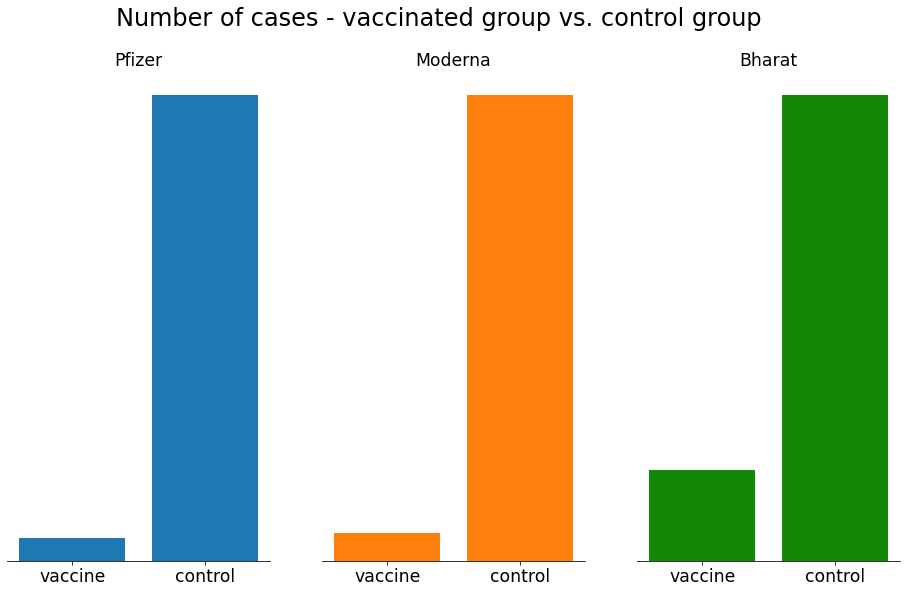

In [9]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.axes.yaxis.set_visible(False)
ax1.bar(['vaccine', 'control'], ratios(pfizer), color='#1f77b4')
ax1.set_title('Pfizer')

ax2.axes.yaxis.set_visible(False)
ax2.bar(['vaccine', 'control'], ratios(moderna), color='#ff7f0e')
ax2.set_title('Moderna')

ax3.axes.yaxis.set_visible(False)
ax3.bar(['vaccine', 'control'], ratios(covaxin), color='#138808')
ax3.set_title('Bharat')

fig.suptitle('Number of cases - vaccinated group vs. control group', fontsize=24)
plt.show()

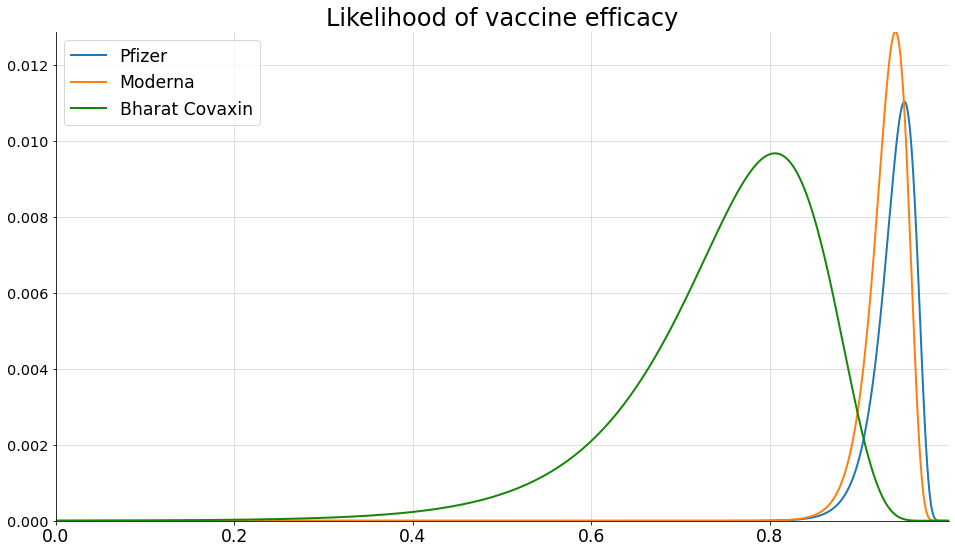

In [10]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = True

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['legend.fontsize'] = 'xx-large'
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['ytick.labelsize'] = 'x-large'

#plt.tick_params(left=False, labelleft=False)

pfizer_y = pfizer_y / np.sum(pfizer_y)
moderna_y = moderna_y / np.sum(moderna_y)
covaxin_y = covaxin_y / np.sum(covaxin_y)

plt.plot(pfizer_x, pfizer_y, color='#1f77b4')
plt.plot(moderna_x, moderna_y, color='#ff7f0e')
plt.plot(covaxin_x, covaxin_y, color='#138808')

plt.legend(['Pfizer', 'Moderna', 'Bharat Covaxin'])
plt.title('Likelihood of vaccine efficacy', fontsize=24)
plt.show()